# PCA
Visualising the PCA of the n_gram features

In [14]:
#Imports
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [15]:
path = "/Users/conorosully/Documents/Legal-Case-Prediction/data/features/english/article{}_{}.csv"

parts = ["full","procedure","facts","circumstances","relevant","law","other"]
full = pd.read_csv(path.format('6','full'))
facts = pd.read_csv(path.format('6','facts'))
other = pd.read_csv(path.format('6','other'))
law = pd.read_csv(path.format('6','law'))

#other = pd.read_csv(path.format('6','other'))
pd.options.display.max_columns = 15
print(len(facts))
facts.head()

918


,able,abroad,abscond,absence,absent,abuse,acar,...,years,years imprisonment,young,zagreb,от,по,target
0,0,0,0,0,0,1,0,...,1,1,0,0,0,0,nonviolation
1,0,0,0,0,0,1,0,...,13,4,2,0,0,0,nonviolation
2,0,0,0,0,0,0,0,...,6,5,0,0,0,0,nonviolation
3,1,0,0,1,0,1,0,...,19,7,0,0,0,0,nonviolation
4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,nonviolation


## PCA

In [16]:
def visPCA(name,df,ax): 
    features = df.columns[:-1]
    # Separating out the features
    x = df.loc[:, features].values
    # Separating out the target
    y = df.loc[:,['target']].values
    # Standardizing the features
    x = StandardScaler().fit_transform(x)
    
    pca = PCA(n_components=2)
    principalComponents = pca.fit_transform(x)
    principalDf = pd.DataFrame(data = principalComponents
                 , columns = ['principal component 1', 'principal component 2'])
    
    finalDf = pd.concat([principalDf, df[['target']]], axis = 1)
    
    ax.set_xlabel('Principal Component 1', fontsize = 15)
    ax.set_ylabel('Principal Component 2', fontsize = 15)
    if name == 'full':
        name = 'procedure + facts'
    ax.set_title('PCA: {}'.format(name), fontsize = 20)
    targets = ['nonviolation', 'violation']
    colors = ['r', 'b']
    for target, color in zip(targets,colors):
        indicesToKeep = finalDf['target'] == target
        ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
                   , finalDf.loc[indicesToKeep, 'principal component 2']
                   , c = color
                   , s = 50)
    ax.legend(targets)
    ax.grid() 
    #plt.savefig(path.format(name))
    
path = "/Users/conorosully/Google Drive/Trinity/Dissertation/Docs/Interim report/Sections/Figures/pca_{}.png"



/Users/conorosully/miniconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:880: MatplotlibDeprecationWarning: 
Using pyplot.axes(ax) with ax an Axes argument is deprecated. Please use pyplot.sca(ax) instead.
  message="Using pyplot.axes(ax) with ax an Axes "
/Users/conorosully/miniconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/conorosully/miniconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/conorosully/miniconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:880: MatplotlibDeprecationWarning: 
Using pyplot.axes(ax) with ax an Axes argument is deprecated. Please use pyplot.sca(ax) instead.
  message="Using pyplot.axes(ax) with ax an Axes "
/Users/conoros

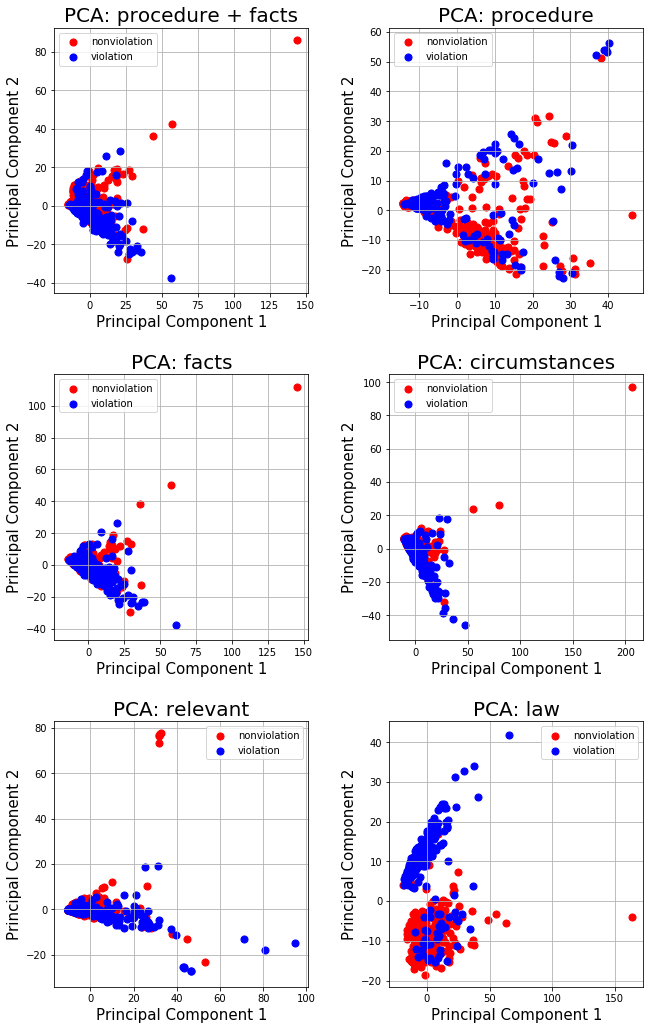

In [18]:
fig, ax = plt.subplots( nrows=3, ncols=2,figsize=(10,15))
plt.tight_layout(pad=5,h_pad =6)

path = "/Users/conorosully/Documents/Legal-Case-Prediction/data/features/english/article{}_{}.csv"
parts = ["full","procedure","facts","circumstances","relevant","law"]

count = 0
for row in ax:
    for grid in row:
        
        plt.axes(grid)
        
        df = pd.read_csv(path.format('8',parts[count]))
        visPCA(parts[count],df,grid)
        count += 1
        
path = "/Users/conorosully/Google Drive/Trinity/Dissertation/Docs/Interim report/Sections/Figures/pca_{}.eps"
plt.savefig(path.format('parts'),format='eps',dpi=1000)


/Users/conorosully/miniconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/conorosully/miniconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


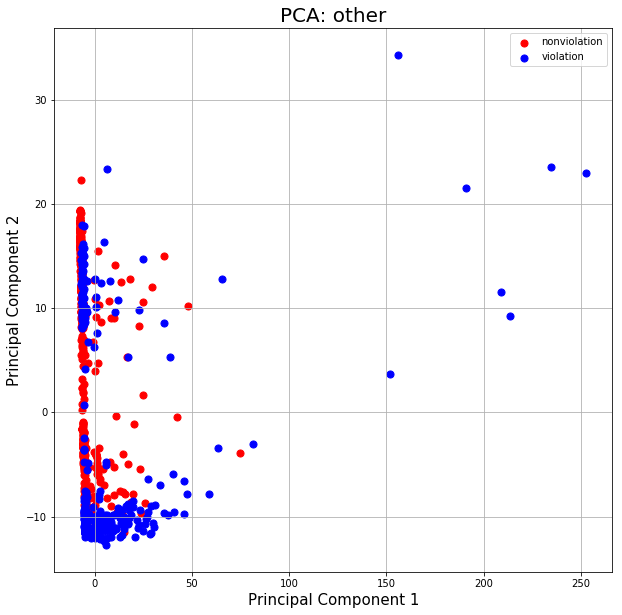

In [23]:
fig, ax = plt.subplots( nrows=1, ncols=1,figsize=(10,10))
#plt.tight_layout(pad=5,h_pad =6)

path = "/Users/conorosully/Documents/Legal-Case-Prediction/data/features/english/article{}_{}.csv"

        
df = pd.read_csv(path.format('6','other'))
visPCA('other',df,ax)
        
path = "/Users/conorosully/Google Drive/Trinity/Dissertation/Docs/Interim report/Sections/Figures/pca_{}.eps"
plt.savefig(path.format('other'),format='eps',dpi=1000)


/Users/conorosully/miniconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/conorosully/miniconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


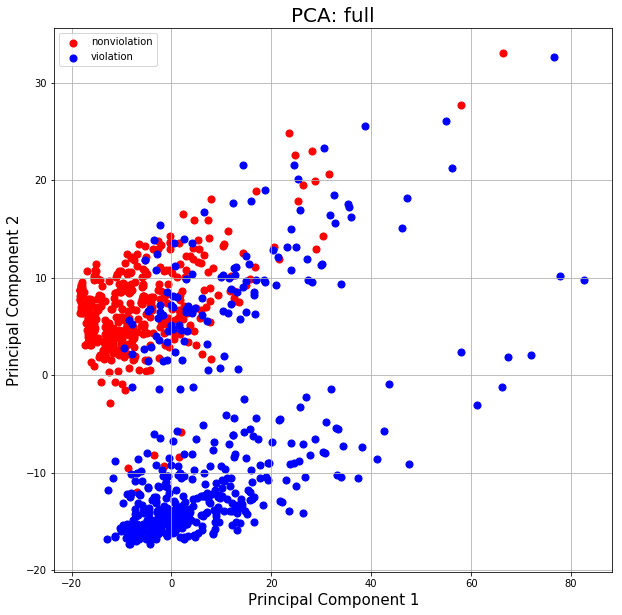

In [37]:
fig, ax = plt.subplots( nrows=1, ncols=1,figsize=(10,10))
#plt.tight_layout(pad=5,h_pad =6)

path = "/Users/conorosully/Documents/Legal-Case-Prediction/data/features/english/article{}_{}.csv"

        
df = pd.read_csv(path.format('6','full'))
visPCA('full',df,ax)
        
path = "/Users/conorosully/Google Drive/Trinity/Dissertation/Docs/Final/Sections/Figures/pca_{}.eps"
plt.savefig(path.format('full'),format='eps',dpi=1000)